# The Objects Lab

###   `__repr__`  vs  `__str__`

The way printing works is that Python wants classes to implement a `__repr__` and a `__str__` method. It will use inheritance to give the built-in `object`'s methods when these are not defined...but any class can define these. When an *instance* of such a class is interrogated with the `repr` or `str` function, then these underlying methods are called.

Rules used (see http://stackoverflow.com/questions/1436703/difference-between-str-and-repr-in-python):

- if you override `__repr__`, that's ALSO used for `__str__`, but not vice versa
- `__str__` on a built-on container uses the contained objects `__repr__`

Some advice on thisI found useful:

- From Alex Martelli: 
>So, my advice: focus on making __str__ reasonably human-readable, and __repr__ as unambiguous as you possibly can.

From SO:
>This means, in simple terms: almost every object you implement should have a functional __repr__ that’s usable for understanding the object. Implementing __str__ is optional: do that if you need a “pretty print” functionality

Usually people will have the repr print out a constructor form. Ned Batchelder:
>My rule of thumb:  __repr__ is for developers, __str__ is for customers.



### 1. `__str__`

Implement `__str__` for `class Animal` below to simply print "Animal Jane" for an Animal with name Jane. Keep your code as general as possible.

In [1]:
class Animal():
    
    def __init__(self, name):
        self.name=name

    def __repr__(self):
        class_name = type(self).__name__
        return "%s(name=%r)" % (class_name, self.name)
    
    #your code here
    def __str__(self):
        return "Animal " + self.name


In [2]:
A=Animal("Tom")
B=Animal("Jane")

In [3]:
B#the ipython REPL uses __repr__ even if __str__ is defined

Animal(name='Jane')

In [4]:
print(B)#printing uses __str__

Animal Jane


In [5]:
print(str(B)) # uses __str__
print(repr(B)) # uses __repr__

Animal Jane
Animal(name='Jane')


Notice that printing things in a list uses the item's `__repr__`:

In [6]:
print([A, B])

[Animal(name='Tom'), Animal(name='Jane')]


In [7]:
import reprlib #reprlib.repr provides small size representations of object strings

In [8]:
reprlib.repr([A]*50)

"[Animal(name='Tom'), Animal(name='Tom'), Animal(name='Tom'), Animal(name='Tom'), Animal(name='Tom'), Animal(name='Tom'), ...]"

### Properties, Descriptors, and Setters

Our earlier `ComplexClass` gave direct access to both the `real` and `imaginary` parts of the complex number. But lets say we wanted to build a strange complex number which did not allow you to change the imaginary part of a complex number. We then use properties to "encapsulate" the actual values of the complex number. There is a `@property` decorator that does this for us. Its actually instantiates a class for us which is something called a `descriptor`, but that too is a story for later. Currently we just treat it as a black box.

In [9]:
class ComplexClass():
    
    def __init__(self, a, b):
        self.__real = a
        self.__imaginary = b
    
    def __repr__(self):
        class_name = type(self).__name__
        return "%s(real=%r, imaginary=%r)" % (class_name, self.__real, self.__imaginary)
        
    @property
    def real(self):
        return self.__real
    
    @real.setter
    def real(self, value=None):
        if value:
            self.__real=value
            
    @property
    def imaginary(self):
        return self.__imaginary
    

In [10]:
c1 = ComplexClass(1,2)
c1.real, c1.imaginary

(1, 2)

Notice that I can change the value of the real part and make it read-only

In [11]:
c1.real = 5

But I cannot change the value of the imaginary part

In [12]:
c1.imaginary = 3

AttributeError: can't set attribute

### Q2. Add a class method

Implement a class method `make_complex` that takes two arguments and constructs a complex number for us. Rewrite the class definition above with this method.

Also add a `__str__` method to print out complex numbers in the usual form `1+2i`.

Test (informally) that both your methods work.

In [13]:
#your code here
class ComplexClass():
    
    def __init__(self, a, b):
        self.__real = a
        self.__imaginary = b
    
    def __repr__(self):
        class_name = type(self).__name__
        return "%s(real=%r, imaginary=%r)" % (class_name, self.__real, self.__imaginary)
        
    @property
    def real(self):
        return self.__real
    
    @real.setter
    def real(self, value=None):
        if value:
            self.__real=value
            
    @property
    def imaginary(self):
        return self.__imaginary
    
    # add as static method
    @staticmethod
    def make_complex(x, y):
        c = ComplexClass(x, y)
        return c
    
    def __str__(self):
        if self.__imaginary >= 0:
            return str(self.__real)+"+"+str(self.__imaginary)+"i"
        else:
            return str(self.__real)+str(self.__imaginary)+"i"
    

In [14]:
# your code here
c = ComplexClass.make_complex(3, 4)
print(c)

3+4i


In [15]:
# your code here
print(ComplexClass.make_complex(-20, -4))

-20-4i


Notice that python marginally obfuscates variables with two leading underscores. But where are our properties?

In [16]:
vars(c1)

{'_ComplexClass__imaginary': 2, '_ComplexClass__real': 5}

This tells us a bit about lookup with properties. When you do instance.attribute for something marked as a property, it is first looked up in instance.__class__ and only then in the instance specific dictionary. 

In [17]:
vars(type(c1))

mappingproxy({'__module__': '__main__', 'imaginary': <property object at 0x1041c7d18>, 'real': <property object at 0x1041c7228>, '__weakref__': <attribute '__weakref__' of 'ComplexClass' objects>, '__dict__': <attribute '__dict__' of 'ComplexClass' objects>, '__repr__': <function ComplexClass.__repr__ at 0x1041d1048>, '__doc__': None, '__init__': <function ComplexClass.__init__ at 0x1041b9ea0>})

The usual way in Python is exactly the reverse, a variable called as `self.x` is first looked up in the instance dictionary, and only then in the class dictionary.

### A sequence for light curves

In [18]:
!head -5 ../../data/CEPH/lc_1.3441.15.B.mjd

#Field Tile Seq RA(hour) Dec(deg) Filter mean_Mag med_Mag mean_(B-R) med_(B-R)
#1 3441 15 5.03111 -69.3896 B -9.765 -9.748 0.219 0.243
#MJD Mag Err
48823.477419 -9.332 0.012
48823.487014 -9.396 0.01


In [19]:
def lc_reader(filename):
    lclist=[]
    with open(filename) as fp:
        for line in fp:
            if line.find('#')!=0:
                lclist.append([float(f) for f in line.strip().split()])
    return lclist
                

In [20]:
eg = lc_reader("../../data/CEPH/lc_1.3441.15.B.mjd")
eg[:5]

[[48823.477419, -9.332, 0.012],
 [48823.487014, -9.396, 0.01],
 [48823.496759, -9.358, 0.011],
 [48824.458206, -9.333, 0.003],
 [48824.467697, -9.333, 0.003]]

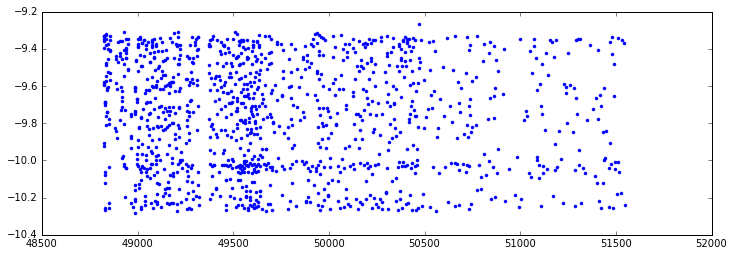

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot([x[0] for x in eg], [x[1] for x in eg],'.');

### Q3. Reader with metadata

The first two lines of the file, after the `#` have facet names and facet values. These are in the same order and space separated. Change `lc_reader` ro parse these lines as well, returning both the list we had earlier, and a second dictionary of facetnames and facetvalues.

In [22]:
!head -5 ../../data/CEPH/lc_1.3441.15.B.mjd

#Field Tile Seq RA(hour) Dec(deg) Filter mean_Mag med_Mag mean_(B-R) med_(B-R)
#1 3441 15 5.03111 -69.3896 B -9.765 -9.748 0.219 0.243
#MJD Mag Err
48823.477419 -9.332 0.012
48823.487014 -9.396 0.01


In [23]:
# your code here
def lc_reader(filename):
    lclist=[]
    lcfacets = {}
    with open(filename) as fp:
        # read first two lines and store in dict
        lcfacets = dict(zip(fp.readline().strip().split()[1:], fp.readline().strip().split()[1:]))
        
        # convert types
        lcfacets['Dec(deg)'] = float(lcfacets['Dec(deg)'])
        lcfacets['RA(hour)'] = float(lcfacets['RA(hour)'])
        lcfacets['Seq'] = int(lcfacets['Seq'])
        lcfacets['Tile'] = int(lcfacets['Tile'])
        lcfacets['mean_(B-R)'] = float(lcfacets['mean_(B-R)'])
        lcfacets['mean_Mag'] = float(lcfacets['mean_Mag'])
        lcfacets['med_(B-R)'] = float(lcfacets['med_(B-R)'])
        lcfacets['med_Mag'] = float(lcfacets['med_Mag'])
        for line in fp:
            if line.find('#')!=0:
                lclist.append([float(f) for f in line.strip().split()])
    return lclist, lcfacets

In [24]:
# test 
eg, facets = lc_reader("../../data/CEPH/lc_1.3441.15.B.mjd")
eg[:5], facets

([[48823.477419, -9.332, 0.012],
  [48823.487014, -9.396, 0.01],
  [48823.496759, -9.358, 0.011],
  [48824.458206, -9.333, 0.003],
  [48824.467697, -9.333, 0.003]],
 {'Dec(deg)': -69.3896,
  'Filter': 'B',
  'RA(hour)': 5.03111,
  'Seq': 15,
  'Tile': 3441,
  'mean_(B-R)': 0.219,
  'mean_Mag': -9.765,
  'med_(B-R)': 0.243,
  'med_Mag': -9.748})

We use your definition above to write a `LightCurve` class with a class method that reads the light curve from a file. 

### Q4. A Light Curve Class with properties

Since data in a light-curve is read-once, we use properties to prevent any changes to the data. Add to the light curve class below read-only properties `time`, `amplitude` which correspond to `_time` and `_amplitude`, and also a read-only property `timeseries` which zips these together. Notice how `self.timeseries` is used in `__repr__` below. 

In [25]:
import itertools
class LightCurve:
    
    def __init__(self, data, metadict):
        self._time = [x[0] for x in data]
        self._amplitude = [x[1] for x in data]
        self._error = [x[2] for x in data]
        self.metadata = metadict
        self.filename = None
    
    @classmethod
    def from_file(cls, filename):
        lclist, metadict = lc_reader(filename)
        instance = cls(lclist, metadict)
        instance.filename = filename
        return instance
    
    def __repr__(self):
        class_name = type(self).__name__
        components = reprlib.repr(list(itertools.islice(self.timeseries,0,10)))
        components = components[components.find('['):]
        return '{}({})'.format(class_name, components)        
        
    #your code here
    @property
    def time(self):
        return self._time
    @property
    def amplitude(self):
        return self._amplitude
    @property
    def timeseries(self):
        return zip(self.time, self.amplitude)


In [26]:
l = LightCurve.from_file("../../data/CEPH/lc_1.3441.15.B.mjd")
l

LightCurve([(48823.477419, -9.332), (48823.487014, -9.396), (48823.496759, -9.358), (48824.458206, -9.333), (48824.467697, -9.333), (48824.477639, -9.349), ...])

### Q5. Make LightCurve a sequence

But our Lightcurves class is not a sequence yet! It implements none of the sequence protocol. The `__repr__` above makes it look like one, but its your job to make it one! (Hint: dont change the O-complexity behavior of indexing)

In [27]:
#your code here
import itertools
class LightCurve:
    
    def __init__(self, data, metadict):
        self._time = [x[0] for x in data]
        self._amplitude = [x[1] for x in data]
        self._error = [x[2] for x in data]
        self.metadata = metadict
        self.filename = None
    
    @classmethod
    def from_file(cls, filename):
        lclist, metadict = lc_reader(filename)
        instance = cls(lclist, metadict)
        instance.filename = filename
        return instance
    
    def __repr__(self):
        class_name = type(self).__name__
        components = reprlib.repr(list(itertools.islice(self.timeseries,0,10)))
        components = components[components.find('['):]
        return '{}({})'.format(class_name, components)        
        
    #your code here
    @property
    def time(self):
        return self._time
    @property
    def amplitude(self):
        return self._amplitude
    @property
    def timeseries(self):
        return zip(self.time, self.amplitude)
    
    def __len__(self):
        return len(self.time)
    def __getitem__(self, index):
        return (self._time[index], self._amplitude[index])

In [28]:
l2 = LightCurve.from_file("../../data/CEPH/lc_1.3441.15.B.mjd")
l2

LightCurve([(48823.477419, -9.332), (48823.487014, -9.396), (48823.496759, -9.358), (48824.458206, -9.333), (48824.467697, -9.333), (48824.477639, -9.349), ...])

In [29]:
len(l2)

1233

In [30]:
l2[100]

(48974.325278, -10.251)

In [31]:
l2[1:3]# this will be not quite what we want given our __repr__

([48823.487014, 48823.496759], [-9.396, -9.358])

The reason for the above not being quite the result we expect is because we dont yet know how Python handles slices. We shall do this next week!

### A database for light curves

We now write a small little database class whose game is to read all light curves from a directory, store them in memory and construct an "index" on the field, tile, and color that these light-curves have.

A light curve filename of the form `lc_1.3441.15.B.mjd` means that this data has `field` 1, `tile` 3441, `sequence` 15, and `color` 'B'. We'll parse the filenames below and store the indexed in internal attributes such as `self._field_index`. Note the use of `defaultdict` instead of a regular dictionary (look it up). Are we duplicating Light Curve objects in these indices?

--> No, because each object is only stored once thanks to Pythons naming system

### Q6. 

Write a method `def retrieve(self, facet, value)` which retrieves a list of Light Curves corresponding to the given value of the facet. (like say facet is tile and value is 4661).

In [32]:
import os
from collections import defaultdict
class LightCurveDB:
    
    def __init__(self):
        self._collection={}
        self._field_index=defaultdict(list)
        self._tile_index=defaultdict(list)
        self._color_index=defaultdict(list)
    
    def populate(self, folder):
        for root,dirs,files in os.walk(folder): # DEPTH 1 ONLY
            for file in files:
                if file.find('.mjd')!=-1:
                    the_path = root+"/"+file
                    self._collection[file] = LightCurve.from_file(the_path)
    
    def index(self):
        for f in self._collection:
            lc, tilestring, seq, color, _ = f.split('.')
            field = int(lc.split('_')[-1])
            tile = int(tilestring)
            self._field_index[field].append(self._collection[f])
            self._tile_index[tile].append(self._collection[f])
            self._color_index[color].append(self._collection[f])
     
    #your code here
    def retrieve(self, facet, value):
        # support for facet values ['tile', 'seq', 'color', 'field']
        if facet == 'tile':
            return self._tile_index[value]
        elif facet == 'color':
            return self._color_index[value]
        elif facet == 'field':
            return self._field_index[value]
        else:
            print('unsupported facet value')
            return []


In [33]:
ldb = LightCurveDB()
ldb.populate("../../data/CEPH")
ldb.index()

In [34]:
ldb.retrieve('tile', 4661) # do this

[LightCurve([(48823.487014, -9.441), (48824.458206, -9.657), (48824.467697, -9.648), (48824.477639, -9.636), (48825.483183, -9.784), (48825.492847, -9.786), ...]),
 LightCurve([(48984.446505, -9.979), (48985.497512, -9.903), (48987.465058, -9.65), (48988.469595, -9.613), (48996.486991, -9.997), (48998.445995, -9.787), ...])]

### Q7. Module-arity

Put your `lc_reader`, and `LightCurve` and `LightCurveDB` classes in a module: a separate file, named lc.py. Organize the imports at the top. The following code should then work here

In [35]:
import lc
ldb2 = lc.LightCurveDB()
ldb2.populate("../../data/CEPH")
ldb2.index()
ldb2.retrieve('tile', 4661)

[LightCurve([(48823.487014, -9.441), (48824.458206, -9.657), (48824.467697, -9.648), (48824.477639, -9.636), (48825.483183, -9.784), (48825.492847, -9.786), ...]),
 LightCurve([(48984.446505, -9.979), (48985.497512, -9.903), (48987.465058, -9.65), (48988.469595, -9.613), (48996.486991, -9.997), (48998.445995, -9.787), ...])]